In [36]:
# Detailed EDA on Top 50 Worlds Best Hotels

In [37]:
import pandas as pd
import numpy as np

from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

sns.set(style="whitegrid")
%matplotlib inline

In [38]:
df = pd.read_csv('/content/Worlds Best 50 Hotels.csv', encoding='latin1')
df.head()

,Rank,Name,Location,Overview,Total Rooms,Starting Rate in ($),Dining Area,Drinking Area,Hotel Ammenties,Address,Number
0,1,Capella Bangkok,Bangkok,A calming riverside oasis in the centre of cac...,101,600,Côte by Mauro Colagreco and Phra Nakhon,Stella,"Swimming pool(s), spa/wellness centre, fitnes...","300, 2 Charoen Krung Rd, Yan Nawa, Sathon, Ban...",+66 2 098 3888
1,2,Passalacqua,Lake Como,A sumptuous Lake Como retreat made for enjoyin...,24,1300,The Garden Terrace,Bar Terrace,"Spa/wellness centre, fitness centre, family f...","Via Besana, 59, 22010 Moltrasio CO, Italy",+39 031 44311
2,3,Rosewood Hong Kong,Hong Kong,Masterful minimalism meets marble-lined luxury,413,650,Bluhouse and The Dining Room,Darkside,"Swimming pool, spa/wellness centre, fitness c...","18 Salisbury Rd, Tsim Sha Tsui, Hong Kong",+852 3891 8888
3,4,Cheval Blanc,Paris,Uber-stylish riverside luxury and world-class ...,72,3000,Langosteria,Le Tout-Paris,"Swimming pool(s), spa/wellness centre, fitnes...","8 Quai du Louvre, 75001 Paris, France",+33 1 40 28 00 00
4,5,The Upper House,Hong Kong,A temple of Zen high above Hong Kong,117,650,Salisterra,NaN,"Swimming pool, fitness centre, family friendly","88 Queensway, Admiralty, Hong Kong",NaN


In [39]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

Dataset contains 50 rows and 11 columns.



In [40]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Rank                    0
Name                    0
Location                0
Overview                0
Total Rooms             0
Starting Rate in ($)    0
Dining Area             0
Drinking Area           4
Hotel Ammenties         1
Address                 0
Number                  2
dtype: int64


In [41]:
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
Rank                     int64
Name                    object
Location                object
Overview                object
Total Rooms              int64
Starting Rate in ($)     int64
Dining Area             object
Drinking Area           object
Hotel Ammenties         object
Address                 object
Number                  object
dtype: object


In [42]:
df = df.drop(['Number'], axis=1)

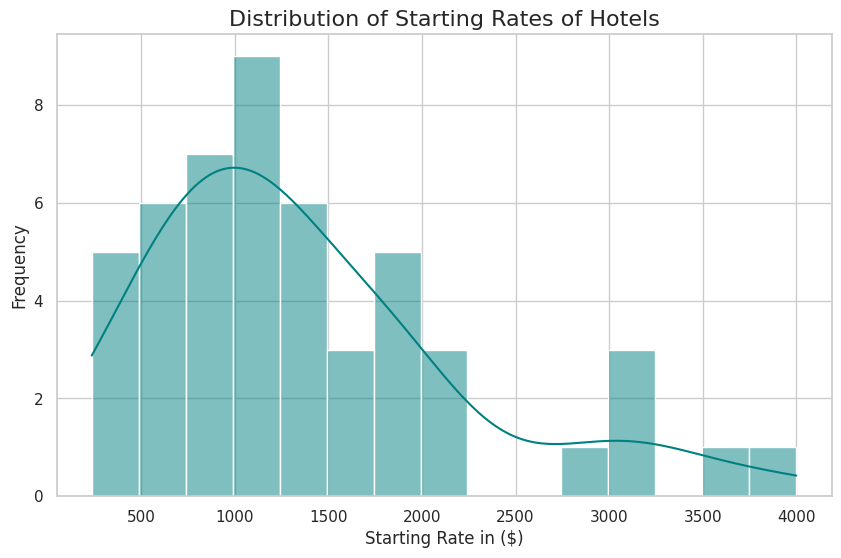

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Starting Rate in ($)'], kde=True, color='teal', bins=15)

plt.title('Distribution of Starting Rates of Hotels', fontsize=16)
plt.xlabel('Starting Rate in ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [44]:
# Overall, the data suggests that while most of the top 50 hotels have starting rates between 500 and 2000 dollars,
      # there are some luxury hotels with much higher rates.

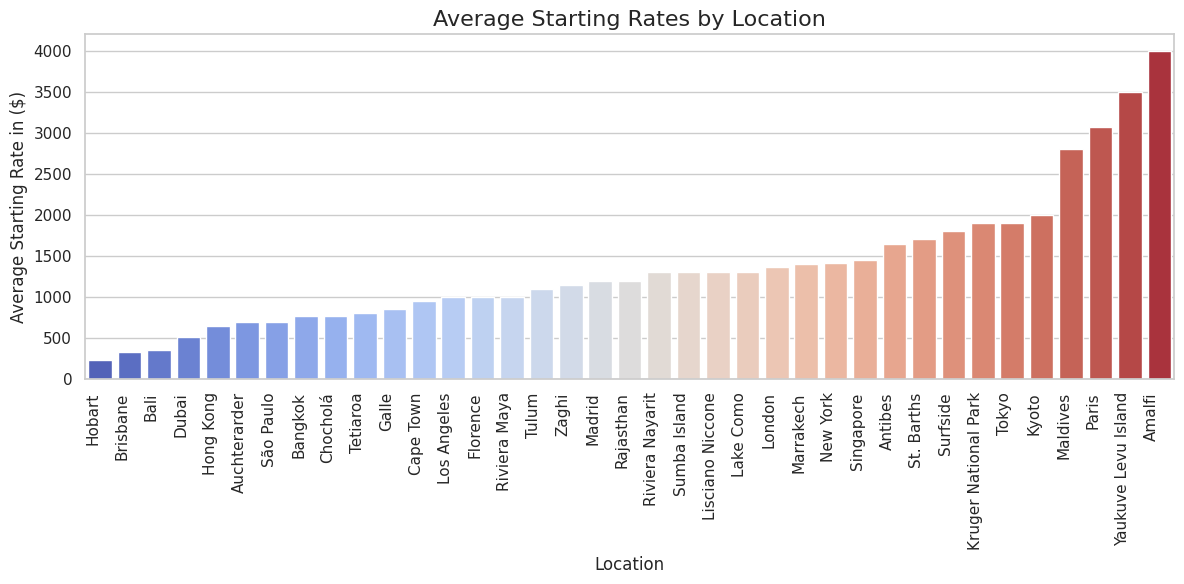

In [45]:
location_rates = df.groupby('Location')['Starting Rate in ($)'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=location_rates.index, y=location_rates.values, palette='coolwarm')

plt.title('Average Starting Rates by Location', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Average Starting Rate in ($)', fontsize=12)

plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [46]:
#Highest Average Rate: The Maldives has the highest average starting rate among all the locations.
#Lowest Average Rate: Hobart has the lowest average starting rate.
# Clustering: There are clusters of locations with similar average rates.
# For example, locations in Asia tend to have lower average rates compared to locations in Europe and North America.

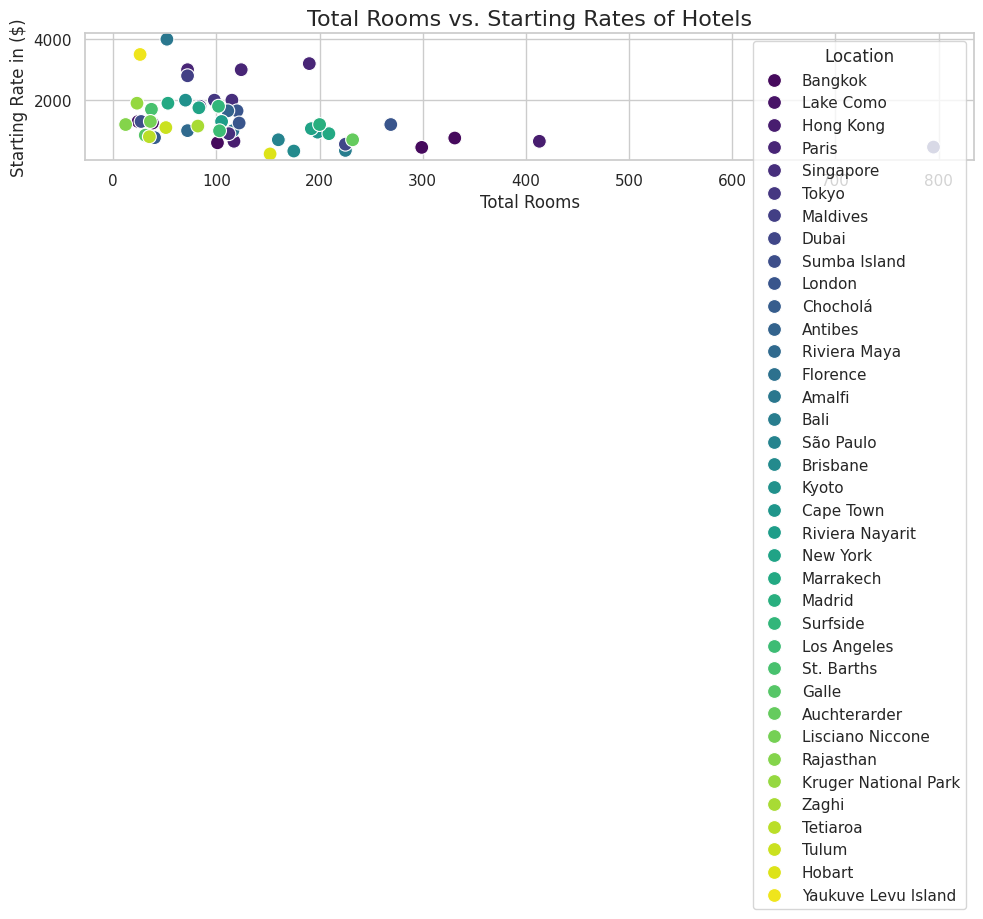

In [47]:
# Total Rooms vs. Starting Rates
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total Rooms', y='Starting Rate in ($)', hue='Location', palette='viridis', s=100)

plt.title('Total Rooms vs. Starting Rates of Hotels', fontsize=16)
plt.xlabel('Total Rooms', fontsize=12)
plt.ylabel('Starting Rate in ($)', fontsize=12)
plt.legend(loc='upper right', title='Location')
plt.tight_layout()
plt.show()

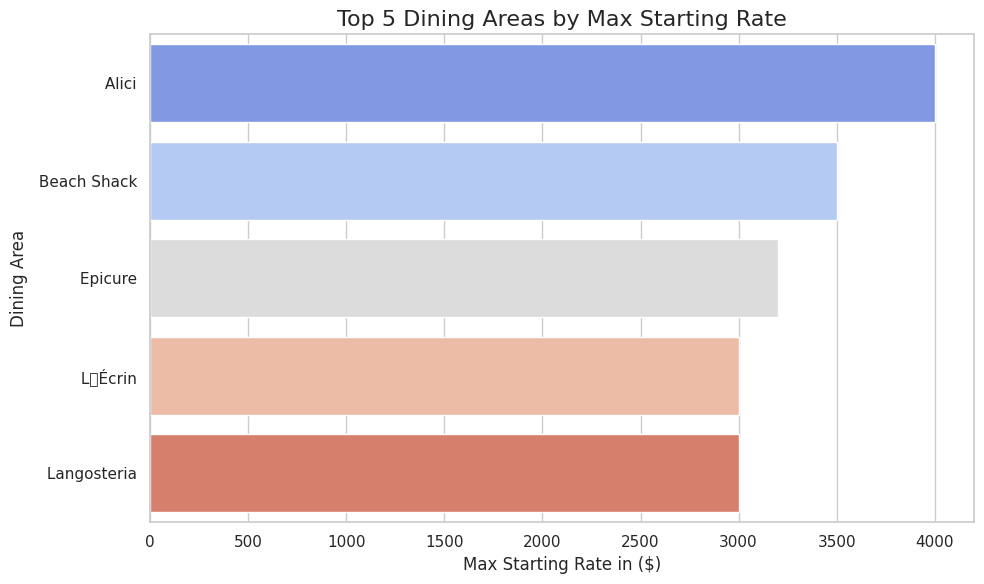

In [48]:
# Top 5 Dining Areas by Location Based on Max Price
top_dining_areas = df.groupby('Dining Area')['Starting Rate in ($)'].max().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_dining_areas.values, y=top_dining_areas.index, palette='coolwarm')

plt.title('Top 5 Dining Areas by Max Starting Rate', fontsize=16)
plt.xlabel('Max Starting Rate in ($)', fontsize=12)
plt.ylabel('Dining Area', fontsize=12)

plt.tight_layout()
plt.show()

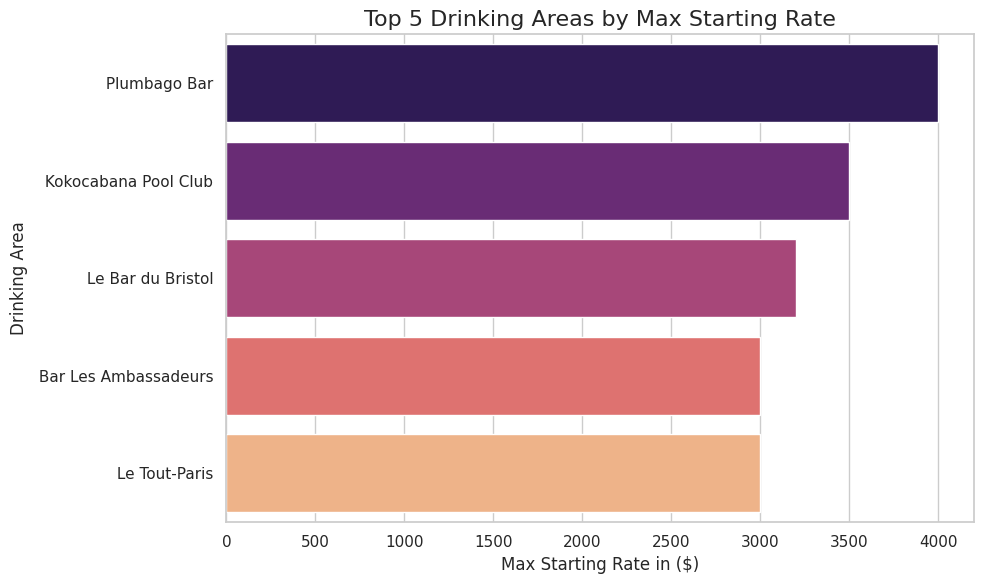

In [49]:
# Top 5 Drinking Areas by Location Based on Max Price
top_drinking_areas = df.groupby('Drinking Area')['Starting Rate in ($)'].max().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_drinking_areas.values, y=top_drinking_areas.index, palette='magma')

plt.title('Top 5 Drinking Areas by Max Starting Rate', fontsize=16)
plt.xlabel('Max Starting Rate in ($)', fontsize=12)
plt.ylabel('Drinking Area', fontsize=12)

plt.tight_layout()
plt.show()

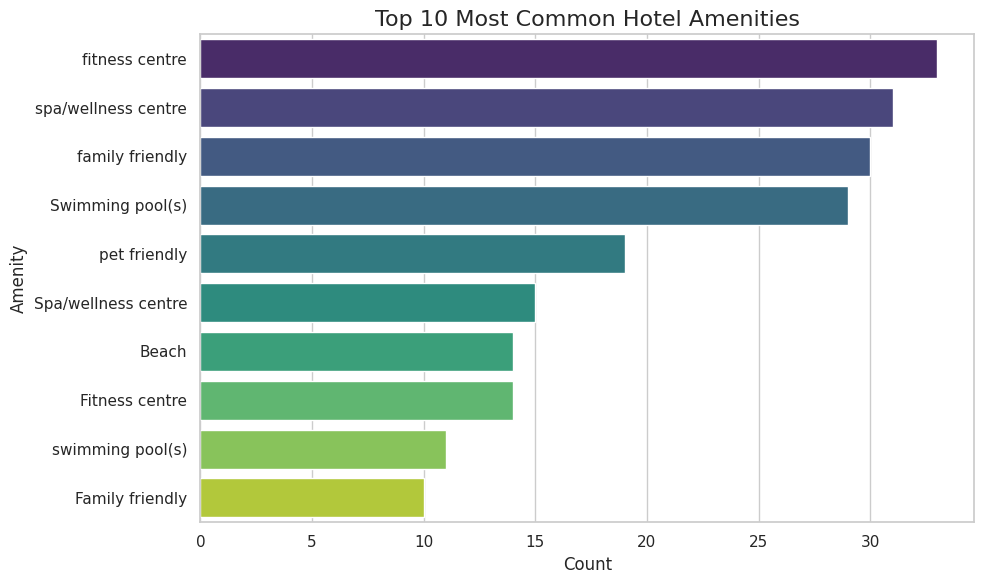

In [50]:
# Most Common Amenities
all_amenities = df['Hotel Ammenties'].str.split(',').explode().str.strip()

# Counting the frequency of each amenity
amenity_counts = Counter(all_amenities)
top_amenities = pd.DataFrame(amenity_counts.most_common(10), columns=['Amenity', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Amenity', data=top_amenities, palette='viridis')

plt.title('Top 10 Most Common Hotel Amenities', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Amenity', fontsize=12)
plt.tight_layout()
plt.show()

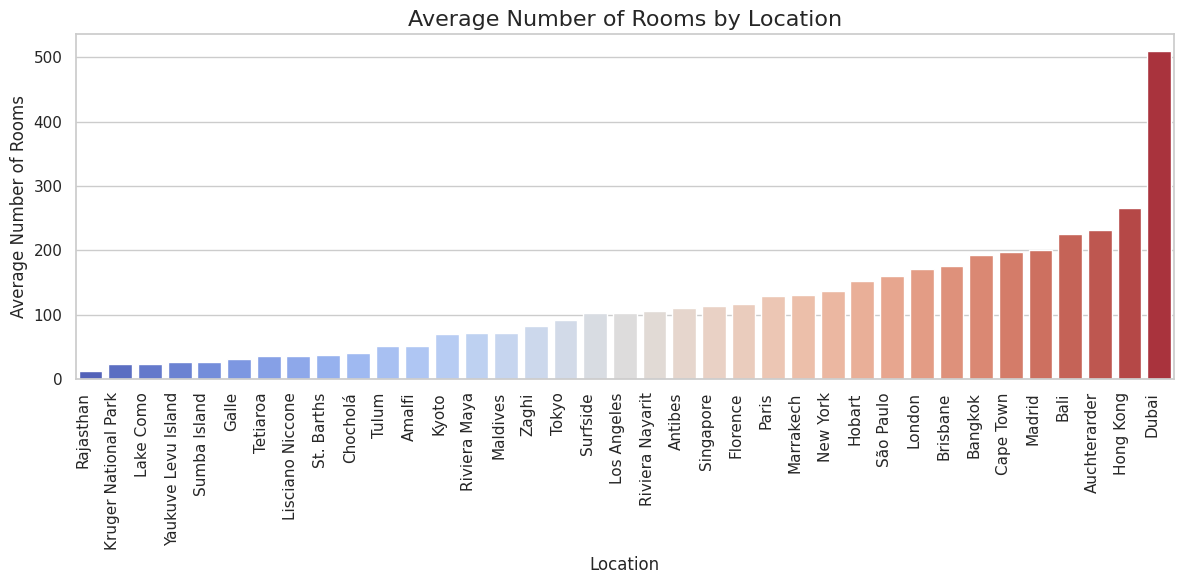

In [51]:
# Average Number of Rooms by Location
avg_rooms_location = df.groupby('Location')['Total Rooms'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rooms_location.index, y=avg_rooms_location.values, palette='coolwarm')

plt.title('Average Number of Rooms by Location', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Average Number of Rooms', fontsize=12)

plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

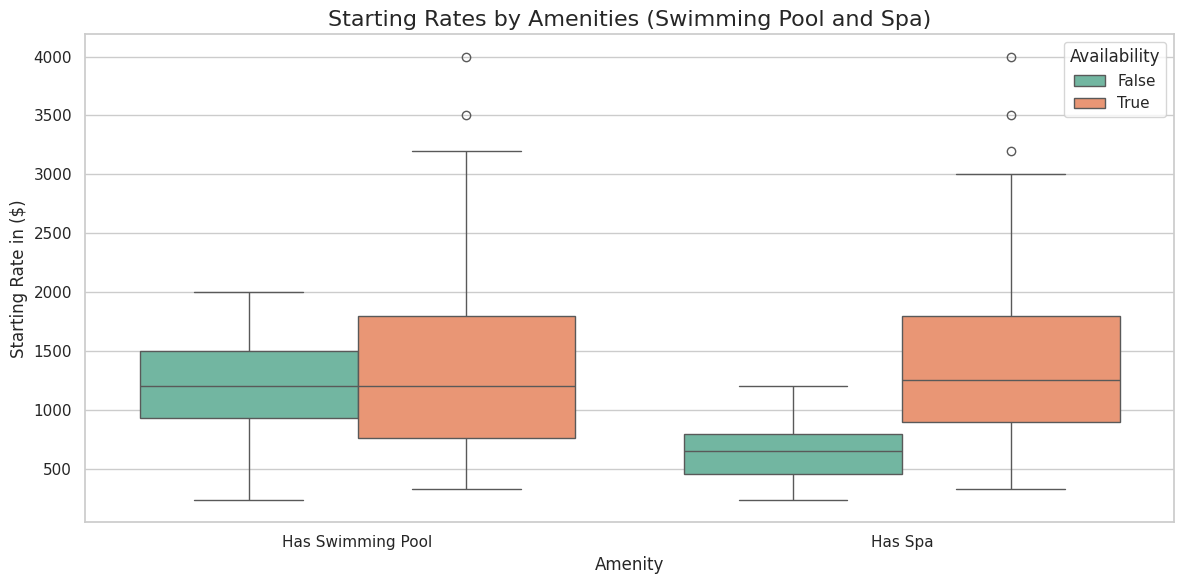

In [52]:
# Lets check starting rates based on whether a hotel has a specific amenity?
df['Has Swimming Pool'] = df['Hotel Ammenties'].str.contains('Swimming pool', case=False, na=False)
df['Has Spa'] = df['Hotel Ammenties'].str.contains('spa/wellness centre', case=False, na=False)

amenity_melted = df.melt(id_vars=['Starting Rate in ($)'],
value_vars=['Has Swimming Pool', 'Has Spa'],
var_name='Amenity', value_name='Available')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Amenity', y='Starting Rate in ($)', hue='Available', data=amenity_melted, palette='Set2')

plt.title('Starting Rates by Amenities (Swimming Pool and Spa)', fontsize=16)
plt.xlabel('Amenity', fontsize=12)
plt.ylabel('Starting Rate in ($)', fontsize=12)

plt.legend(title='Availability')
plt.tight_layout()
plt.show()

In [53]:
# Swimming Pool: Hotels with a swimming pool generally have higher starting rates than those without. The median starting rate for hotels with a swimming pool is around 2000 dollars, while for those without it's around 1000 dollars.
# Spa: Hotels with a spa also tend to have higher starting rates, but the difference is less pronounced compared to the swimming pool. The median starting rate for hotels with a spa is around 1750 dollars.
# Overall, the box plot suggests that having a swimming pool and/or a spa is associated with higher starting rates for luxury hotels. However, the impact of these amenities on the starting rate varies, with swimming pools having a more significant effect than spas.

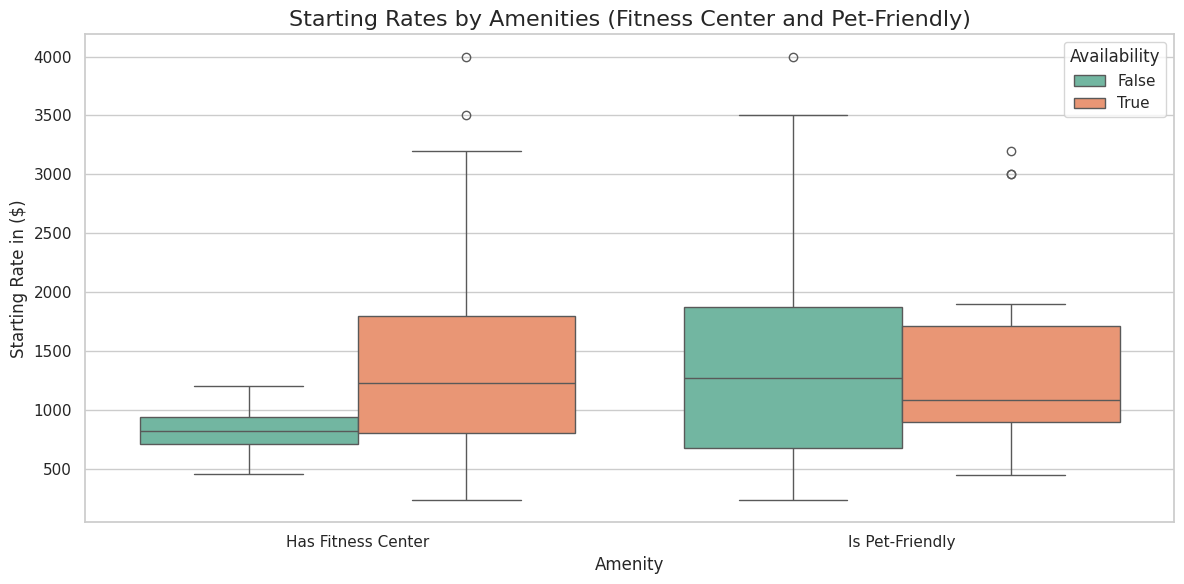

In [54]:
df['Has Fitness Center'] = df['Hotel Ammenties'].str.contains('fitness centre', case=False, na=False)
df['Is Pet-Friendly'] = df['Hotel Ammenties'].str.contains('pet friendly', case=False, na=False)

# Using melting for easier plotting
amenity_melted = df.melt(id_vars=['Starting Rate in ($)'],
                          value_vars=['Has Fitness Center', 'Is Pet-Friendly'],
                          var_name='Amenity', value_name='Available')


plt.figure(figsize=(12, 6))
sns.boxplot(x='Amenity', y='Starting Rate in ($)', hue='Available', data=amenity_melted, palette='Set2')

plt.title('Starting Rates by Amenities (Fitness Center and Pet-Friendly)', fontsize=16)
plt.xlabel('Amenity', fontsize=12)
plt.ylabel('Starting Rate in ($)', fontsize=12)

plt.legend(title='Availability')
plt.tight_layout()
plt.show()

In [55]:
# Fitness Center: Hotels with a fitness center generally have higher starting rates than those without. The median starting rate for hotels with a fitness center is around 1750 dollars, while for those without it's around 1000 dollars.
# Pet-Friendly: Pet-friendly hotels also tend to have slightly higher starting rates, but the difference is less pronounced compared to the fitness center. The median starting rate for pet-friendly hotels is around 1750 dollars.
# Overall, the box plot suggests that having a fitness center and/or being pet-friendly is associated with slightly higher starting rates for luxury hotels. However, the impact of these amenities on the starting rate varies, with fitness centers having a more significant effect than pet-friendliness.